__ https://www.kaggle.com/datasets/mirichoi0218/insurance __
MEdical cost personal Datasets

In [31]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
insurance = pd.read_csv('insurance.csv')
insurance.duplicated().sum()
insurance.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
encoded_insurance = pd.get_dummies(insurance)
encoded_insurance.head(3)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.4620,0,1,1,0,0,0,1,0


In [34]:
X = encoded_insurance.drop("charges" , axis="columns")

In [35]:
y = encoded_insurance['charges']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=43)

In [38]:

from tensorflow import keras
from keras import layers

In [39]:
tf.random.set_seed(42)
insurance_model = keras.Sequential([
    layers.Dense(100, activation="leaky_relu"), 
    layers.Dense(10, activation="leaky_relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1)
])

insurance_model.compile(loss = keras.losses.mae, 
                        optimizer=keras.optimizers.Adam(learning_rate=0.1), 
                        metrics=['mae'])



history = insurance_model.fit(X_train, y_train, epochs=600)
history

Epoch 1/600


34/34 [==============================] - 1s 1ms/step - loss: 8432.4072 - mae: 8432.4072
Epoch 2/600
34/34 [==============================] - 0s 1ms/step - loss: 6174.3311 - mae: 6174.3311
Epoch 3/600
34/34 [==============================] - 0s 1ms/step - loss: 4419.9702 - mae: 4419.9702
Epoch 4/600
34/34 [==============================] - 0s 1ms/step - loss: 3833.4224 - mae: 3833.4224
Epoch 5/600
34/34 [==============================] - 0s 1ms/step - loss: 3575.4187 - mae: 3575.4187
Epoch 6/600
34/34 [==============================] - 0s 1ms/step - loss: 3606.2781 - mae: 3606.2781
Epoch 7/600
34/34 [==============================] - 0s 1ms/step - loss: 2902.1440 - mae: 2902.1440
Epoch 8/600
34/34 [==============================] - 0s 1ms/step - loss: 3111.8831 - mae: 3111.8831
Epoch 9/600
34/34 [==============================] - 0s 1ms/step - loss: 2788.8203 - mae: 2788.8203
Epoch 10/600
34/34 [==============================] - 0s 1ms/step - loss: 3072.4839 - mae: 3072.4839
Epoch 11/60

In [40]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2274.8396 - mae: 2274.8396


[2274.839599609375, 2274.839599609375]

training or loss curve

Text(0.5, 0, 'epochs')

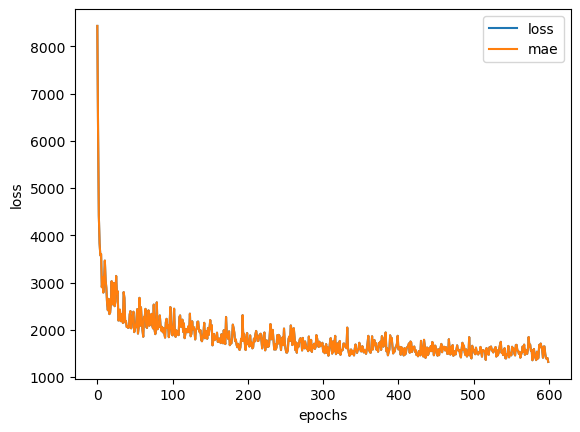

In [41]:
pd.DataFrame(history.history).plot()
plt.ylabel ("loss")
plt.xlabel("epochs")

### preprocessing data (normalization and standardization)

<AxesSubplot: ylabel='Frequency'>

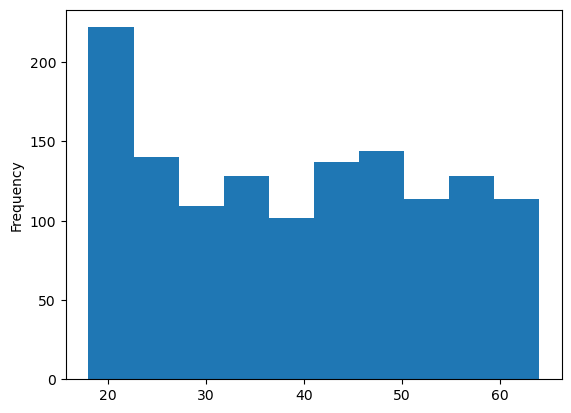

In [42]:
X["age"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

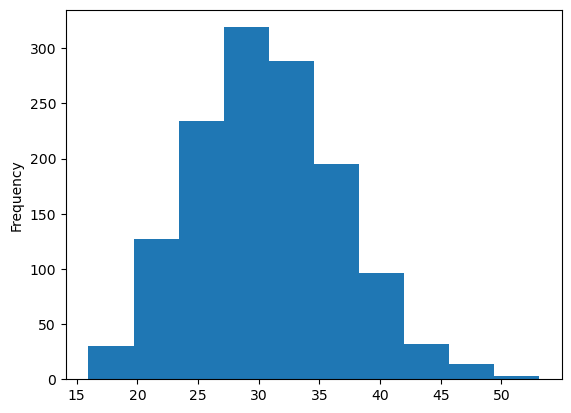

In [43]:
X['bmi'].plot(kind = "hist")

In [44]:
insurance = pd.read_csv("insurance.csv")
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



In [45]:
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown = "ignore"), ['sex', 'smoker', 'region']))

In [46]:
X = insurance.drop("charges" , axis = "columns")
y = insurance['charges']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [49]:
X_train_normal[0], X_train.loc[0]

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object)

In [69]:
model_insurace = keras.Sequential([
    layers.Dense(100, input_shape= ([11]), activation = "leaky_relu"),
    layers.Dense(10),
    layers.Dense(5),
    layers.Dense(1)
])

model_insurace.compile(optimizer= 'adam', 
    loss = 'mae', 
    metrics= ['mae'])

model_insurace.fit(X_train_normal, y_train, epochs= 400)

Epoch 1/400
34/34 [==============================] - 1s 2ms/step - loss: 13344.8770 - mae: 13344.8770
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 13337.6621 - mae: 13337.6621
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 13311.5039 - mae: 13311.5039
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 13240.1768 - mae: 13240.1768
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 13081.1514 - mae: 13081.1514
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 12769.9717 - mae: 12769.9717
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 12222.8252 - mae: 12222.8252
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 11379.5967 - mae: 11379.5967
Epoch 9/400
34/34 [==============================] - 0s 3ms/step - loss: 10358.1064 - mae: 10358.1064
Epoch 10/400
34/34 [==============================] - 0s 1ms/step - loss: 9326.743